## Importing Dependencies

In [ ]:
!pip install pytreebank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
# import fasttext
from sklearn.metrics import f1_score,accuracy_score
import matplotlib.pyplot as plt
import pytreebank
import os,sys
import numpy as np # linear algebra
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Stanford Sentiment Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Stanford Sentiment Dataset/BERT-SST2-Dataset-Paper.pdf
/content/drive/MyDrive/Stanford Sentiment Dataset/Writing Code for NLP Research.pdf
/content/drive/MyDrive/Stanford Sentiment Dataset/dev.txt
/content/drive/MyDrive/Stanford Sentiment Dataset/train.txt
/content/drive/MyDrive/Stanford Sentiment Dataset/test.txt
/content/drive/MyDrive/Stanford Sentiment Dataset/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/rawscores_exp12.txt
/content/drive/MyDrive/Stanford Sentiment Dataset/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/README.txt
/content/drive/MyDrive/Stanford Sentiment Dataset/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/sentlex_exp12.txt
/content/drive/MyDrive/Stanford Sentiment Dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/README.txt
/content/drive/MyDrive/Stanford Sentiment Dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank

In [ ]:
data = pytreebank.load_sst("/content/drive/MyDrive/Stanford Sentiment Dataset/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees")

## Data Exploration

In [ ]:
print(type(data))

<class 'dict'>


In [ ]:
print(len(data)) # data contains three files, 1. train, 2. test, 3. dev file (optional file for validation)

3


In [ ]:
x = data.items()
print(x)

dict_items([('train', [<pytreebank.labeled_trees.LabeledTree object at 0x7f27599035e0>, <pytreebank.labeled_trees.LabeledTree object at 0x7f2721898be0>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218999f0>, <pytreebank.labeled_trees.LabeledTree object at 0x7f272189beb0>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e05e0>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e08b0>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e1480>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e1c90>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e2320>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e2650>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e28c0>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e2f50>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e3820>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27218e3a90>, <pytreebank.labeled_trees.LabeledTree object at 0x7f27216c84c0>, <p

In [ ]:
for item in data['train']:
  print(item)

Streaming output truncated to the last 5000 lines.
(3 (3 (1 (2 (1 (2 Skin) (2 (2 (2 Of) (2 Man) )(2 (2 gets) (2 (1 (2 a) (1 (2 few) (1 (0 cheap) (2 shocks) )))(2 (2 from) (2 (2 its) (2 (2 kids-in-peril) (2 theatrics) )))))))(2 ,) )(2 but) )(3 (2 it) (3 (2 also) (3 (2 taps) (2 (2 into) (2 (2 (2 the) (2 (2 primal) (1 fears) ))(2 (2 of) (2 (2 (2 young) (2 people) )(1 (2 trying) (2 (2 to) (3 (2 cope) (2 (2 with) (2 (2 (2 the) (1 (3 mysterious) (2 (2 and) (2 (2 brutal) (2 nature) ))))(2 (2 of) (2 adults) ))))))))))))))(2 .) )
(1 (3 (2 The) (2 (2 Piano) (2 Teacher) ))(1 (2 (1 (2 is) (1 not) )(3 (2 an) (3 (2 easy) (2 film) )))(2 .) ))
(1 (1 (1 (1 (3 (2 It) (1 (2 forces) (1 (2 you) (2 (2 to) (1 (3 (2 watch) (2 people) )(1 (2 (2 doing) (2 (1 unpleasant) (2 things) ))(2 (2 to) (2 (2 (2 (2 each) (2 other) )(2 and) )(2 themselves) ))))))))(2 ,) )(2 and) )(2 (2 it) (2 (3 (2 maintains) (2 (2 a) (2 (3 cool) (2 distance) )))(1 (2 from) (1 (2 (2 its) (2 material) )(2 (2 that) (1 (2 is) (2 (2 deliberate

In [ ]:
for item in data['train']:
    print(item.to_labeled_lines()[0][0])  # contains labels
    # break

Streaming output truncated to the last 5000 lines.
3
1
1
3
3
1
4
2
3
3
3
3
3
3
4
3
3
2
3
4
3
4
3
4
4
3
3
4
2
4
3
3
3
3
4
4
3
3
3
2
2
3
4
4
4
3
3
3
3
3
4
4
3
4
3
4
2
4
4
4
3
2
3
2
2
1
2
1
1
3
1
3
4
3
3
3
2
2
3
2
3
3
1
3
4
4
3
4
3
4
3
3
3
3
3
3
3
3
4
4
3
3
3
1
3
4
3
4
4
3
2
3
3
3
4
4
3
4
3
4
1
3
4
2
3
3
3
3
3
3
3
3
3
4
2
3
3
4
3
1
3
3
3
2
4
3
4
4
3
2
1
2
4
2
3
0
1
4
3
1
3
3
3
3
2
2
2
4
2
3
3
1
2
1
3
3
2
4
4
3
1
4
3
1
3
4
3
2
3
3
4
4
2
3
3
4
3
3
3
3
3
2
3
3
3
3
2
2
3
4
3
3
3
2
1
4
3
2
3
4
3
1
3
2
3
4
4
3
2
4
4
3
2
3
3
3
3
3
3
3
3
2
3
4
2
4
3
2
2
3
3
2
3
3
3
2
3
3
2
4
3
1
0
4
1
4
2
4
3
3
3
2
3
3
3
3
2
1
3
4
2
3
3
3
3
4
3
3
3
4
3
4
3
3
3
1
3
2
3
3
4
1
4
3
2
2
1
3
4
3
4
2
1
4
3
4
3
0
3
3
2
4
4
3
4
2
3
4
4
3
4
3
1
4
3
3
3
3
3
3
3
4
4
4
3
3
4
4
3
3
2
2
2
3
2
3
4
3
4
3
4
1
3
2
3
2
3
4
2
4
3
3
3
3
3
4
2
3
3
4
3
2
4
4
2
3
3
2
3
3
3
3
3
3
3
2
2
3
3
2
3
2
3
3
4
0
3
2
3
3
4
4
3
4
3
4
1
2
3
4
4
3
3
2
4
3
4
2
4
4
3
2
4
1
3
2
3
4
2
1
2
4
4
1
3
4
3
4
3
4
2
4
3
1
3
4
4
0
3
3
4
4
4
3
4
1
3
4
4
3
4
3
4
2
3

In [ ]:
for item in data['train']:
    print(item.to_labeled_lines()[0][1])  # contains text from the dataset
    break

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .


In [ ]:
for item in data['train']:
    print(item.to_labeled_lines()[0][0],item.to_labeled_lines()[0][1])
    # break

Streaming output truncated to the last 5000 lines.
3 Skin Of Man gets a few cheap shocks from its kids-in-peril theatrics , but it also taps into the primal fears of young people trying to cope with the mysterious and brutal nature of adults .
1 The Piano Teacher is not an easy film .
1 It forces you to watch people doing unpleasant things to each other and themselves , and it maintains a cool distance from its material that is deliberately unsettling .
3 As refreshing as a drink from a woodland stream .
3 Williams absolutely nails Sy 's queasy infatuation and overall strangeness .
1 Can I admit XXX is as deep as a Petri dish and as well-characterized as a telephone book but still say it was a guilty pleasure ?
4 While it 's nothing we have n't seen before from Murphy , I Spy is still fun and enjoyable and so aggressively silly that it 's more than a worthwhile effort .
2 By the time it ends in a rush of sequins , flashbulbs , blaring brass and back-stabbing babes , it has said plenty 

In [ ]:
import nltk
from nltk.tree import Tree

tree_str = "(1 (2 (2 (2 Just) (2 (2 about) (2 everyone))) (2 (2 involved) (2 here))) (1 (2 (2 seems) (2 (2 to) (2 (2 be) (2 coasting)))) (2 .)))"

# Parse the tree string
tree = Tree.fromstring(tree_str)

# Pretty print the tree
tree.pretty_print()


                                      1                                     
                   ___________________|__________________                    
                  |                                      1                  
                  |                                   ___|________________   
                  2                                  2                    | 
        __________|_______________           ________|___                 |  
       2                          |         |            2                | 
  _____|____                      |         |     _______|___             |  
 |          2                     2         |    |           2            | 
 |      ____|_____          ______|___      |    |        ___|_____       |  
 2     2          2        2          2     2    2       2         2      2 
 |     |          |        |          |     |    |       |         |      |  
Just about     everyone involved     here seems  to      be     coasti

In [ ]:
out_path = os.path.join("/content/drive/MyDrive/Stanford Sentiment Dataset/{}.txt")

In [ ]:
print(out_path)

/content/drive/MyDrive/Stanford Sentiment Dataset/{}.txt


In [ ]:
!ls

drive  sample_data


In [ ]:
for cat in ['train','test','dev']:
    with open(out_path.format(cat),"w") as file:
        for item in data[cat]:
            file.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] +1,
                item.to_labeled_lines()[0][1]
            ))

    print("done with {}".format(file))

done with <_io.TextIOWrapper name='/content/drive/MyDrive/Stanford Sentiment Dataset/train.txt' mode='w' encoding='UTF-8'>
done with <_io.TextIOWrapper name='/content/drive/MyDrive/Stanford Sentiment Dataset/test.txt' mode='w' encoding='UTF-8'>
done with <_io.TextIOWrapper name='/content/drive/MyDrive/Stanford Sentiment Dataset/dev.txt' mode='w' encoding='UTF-8'>


In [ ]:
print(len(data['train']))
print(len(data['test']))
print(len(data['dev']))

8544
2210
1101


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Stanford Sentiment Dataset/train.txt",sep="\t",header=None,names=['label','text'])

In [ ]:
train.head()

label                                               text
0  __label__4  The Rock is destined to be the 21st Century 's...
1  __label__5  The gorgeously elaborate continuation of `` Th...
2  __label__4  Singer/composer Bryan Adams contributes a slew...
3  __label__3  You 'd think by now America would have had eno...
4  __label__4               Yet the act is still charming here .

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8544 non-null   object
 1   text    8544 non-null   object
dtypes: object(2)
memory usage: 133.6+ KB


In [ ]:
train['label'] = train['label'].str.replace("__label__","")
train['label'] = train['label'].astype(int).astype("category")

In [ ]:
for text in train['text']:
  print(text)

Streaming output truncated to the last 5000 lines.
Skin Of Man gets a few cheap shocks from its kids-in-peril theatrics , but it also taps into the primal fears of young people trying to cope with the mysterious and brutal nature of adults .
The Piano Teacher is not an easy film .
It forces you to watch people doing unpleasant things to each other and themselves , and it maintains a cool distance from its material that is deliberately unsettling .
As refreshing as a drink from a woodland stream .
Williams absolutely nails Sy 's queasy infatuation and overall strangeness .
Can I admit XXX is as deep as a Petri dish and as well-characterized as a telephone book but still say it was a guilty pleasure ?
While it 's nothing we have n't seen before from Murphy , I Spy is still fun and enjoyable and so aggressively silly that it 's more than a worthwhile effort .
By the time it ends in a rush of sequins , flashbulbs , blaring brass and back-stabbing babes , it has said plenty about how show b

In [ ]:
train.head()

label                                               text
0     4  The Rock is destined to be the 21st Century 's...
1     5  The gorgeously elaborate continuation of `` Th...
2     4  Singer/composer Bryan Adams contributes a slew...
3     3  You 'd think by now America would have had eno...
4     4               Yet the act is still charming here .

In [ ]:
train['label'].value_counts()

4    2322
2    2218
3    1624
5    1288
1    1092
Name: label, dtype: int64

In [ ]:
negative_label = 0
positive_label = 0
neutral_label = 0
for label in train['label']:
  if label < 3:
    negative_label += 1
  elif label > 3:
    positive_label += 1
  else:
    neutral_label += 1

In [ ]:
print('Negative Labels: ', negative_label)
print('Positive Labels: ', positive_label)
print('Neutral Labels: ', neutral_label)

Negative Labels:  3310
Positive Labels:  3610
Neutral Labels:  1624


In [ ]:
train['len'] = train['text'].str.len()

In [ ]:
train.head()

label                                               text  len
0     4  The Rock is destined to be the 21st Century 's...  181
1     5  The gorgeously elaborate continuation of `` Th...  226
2     4  Singer/composer Bryan Adams contributes a slew...  208
3     3  You 'd think by now America would have had eno...  100
4     4               Yet the act is still charming here .   36

test data

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Stanford Sentiment Dataset/test.txt",sep="\t",header=None,names=['label','text'])
test['label'] = test['label'].str.replace("__label__","")
test['label'] = test['label'].astype(int).astype("category")

In [ ]:
test.head()

label                                               text
0     3                     Effective but too-tepid biopic
1     4  If you sometimes like to go to the movies to h...
2     5  Emerges as something rare , an issue movie tha...
3     3  The film provides some great insight into the ...
4     5  Offers that rare combination of entertainment ...

In [ ]:
test['len'] = test['text'].str.len()

In [ ]:
test.head()

label                                               text  len
0     3                     Effective but too-tepid biopic   30
1     4  If you sometimes like to go to the movies to h...   89
2     5  Emerges as something rare , an issue movie tha...  113
3     3  The film provides some great insight into the ...  138
4     5  Offers that rare combination of entertainment ...   61

## Data Preprocessing

In [ ]:
train.shape

(8544, 3)

In [ ]:
train.isnull().sum()

label    0
text     0
len      0
dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def preprocess_text(text):
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back to form preprocessed text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
# Apply the preprocess_text function to the 'text' column
train['text'] = train['text'].apply(preprocess_text)

In [ ]:
train.head()

label                                               text  len
0     4  rock destined 21st century 's new `` conan `` ...  181
1     5  gorgeously elaborate continuation `` lord ring...  226
2     4  singer/composer bryan adam contributes slew so...  208
3     3  'd think america would enough plucky british e...  100
4     4                             yet act still charming   36

In [ ]:
# Apply the preprocess_text function to the 'text' column
test['text'] = test['text'].apply(preprocess_text)

In [ ]:
test.head()

label                                               text  len
0     3                         effective too-tepid biopic   30
1     4  sometimes like go movie fun wasabi good place ...   89
2     5  emerges something rare issue movie 's honest k...  113
3     3  film provides great insight neurotic mindset c...  138
4     5     offer rare combination entertainment education   61

In [ ]:
X_train = train.drop(columns='label', axis=1)
Y_train = train['label']

In [ ]:
print(X_train)

                                                   text  len
0     rock destined 21st century 's new `` conan `` ...  181
1     gorgeously elaborate continuation `` lord ring...  226
2     singer/composer bryan adam contributes slew so...  208
3     'd think america would enough plucky british e...  100
4                                yet act still charming   36
...                                                 ...  ...
8539                                        real snooze   15
8540                                           surprise   14
8541  've seen hippie-turned-yuppie plot 's enthusia...  130
8542  fan walked muttering word like `` horrible `` ...  154
8543                                          case zero   19

[8544 rows x 2 columns]


In [ ]:
print(Y_train)

0       4
1       5
2       4
3       3
4       4
       ..
8539    1
8540    2
8541    4
8542    1
8543    2
Name: label, Length: 8544, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [ ]:
print(train['text'])

0       rock destined 21st century 's new `` conan `` ...
1       gorgeously elaborate continuation `` lord ring...
2       singer/composer bryan adam contributes slew so...
3       'd think america would enough plucky british e...
4                                  yet act still charming
                              ...                        
8539                                          real snooze
8540                                             surprise
8541    've seen hippie-turned-yuppie plot 's enthusia...
8542    fan walked muttering word like `` horrible `` ...
8543                                            case zero
Name: text, Length: 8544, dtype: object


for train data

In [ ]:
X_train = train['text'].values
Y_train = train['label'].values

In [ ]:
print(X_train)

["rock destined 21st century 's new `` conan `` 's going make splash even greater arnold schwarzenegger jean-claud van damme steven segal"
 "gorgeously elaborate continuation `` lord ring `` trilogy huge column word adequately describe co-writer/director peter jackson 's expanded vision j.r.r tolkien 's middle-earth"
 'singer/composer bryan adam contributes slew song -- potential hit simply intrusive story -- whole package certainly capture intended er spirit piece'
 ...
 "'ve seen hippie-turned-yuppie plot 's enthusiastic charm fire make formula fresh"
 "fan walked muttering word like `` horrible `` `` terrible `` much fun dissing film n't mind ticket cost"
 'case zero']


In [ ]:
print(Y_train)

[4, 5, 4, 3, 4, ..., 1, 2, 4, 1, 2]
Length: 8544
Categories (5, int64): [1, 2, 3, 4, 5]


for test data

In [ ]:
X_test = test['text'].values
Y_test = test['label'].values

In [ ]:
print(X_test)

['effective too-tepid biopic'
 'sometimes like go movie fun wasabi good place start'
 "emerges something rare issue movie 's honest keenly observed n't feel like one"
 ... 'hilarious romantic comedy' 'never sink exploitation'
 'u nrelentingly stupid']


## Feature Extraction

In [ ]:
X_train.shape

(8544,)

In [ ]:
X_test.shape

(2210,)

In [ ]:
# converting the textual data to feature vectors
train_vectorizer = TfidfVectorizer()
train_vectorizer.fit(X_train)

X_train = train_vectorizer.transform(X_train)
X_test = train_vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 13236)	0.23144238063722034
  (0, 11706)	0.21227563331296045
  (0, 11523)	0.25880423558854493
  (0, 10783)	0.27950267982098714
  (0, 10668)	0.2466964218892982
  (0, 10360)	0.19489855814918727
  (0, 8283)	0.15057582352176455
  (0, 7500)	0.12393938585049007
  (0, 6696)	0.2466964218892982
  (0, 5429)	0.25214082486966255
  (0, 5313)	0.17695852377387353
  (0, 4266)	0.13415059126332063
  (0, 3290)	0.25214082486966255
  (0, 2980)	0.2673948661217404
  (0, 2479)	0.2673948661217404
  (0, 2203)	0.27950267982098714
  (0, 1969)	0.21227563331296045
  (0, 761)	0.2345886081900514
  (0, 78)	0.2466964218892982
  (1, 13811)	0.16477041618567378
  (1, 13758)	0.17881810281540758
  (1, 13368)	0.19382468926746296
  (1, 12683)	0.25542307809355697
  (1, 12505)	0.25542307809355697
  (1, 10316)	0.20767359750728176
  :	:
  (8541, 10779)	0.23966229702032862
  (8541, 9179)	0.21695733142912457
  (8541, 7500)	0.17616780020546954
  (8541, 5835)	0.3678650862647612
  (8541, 4989)	0.27120583175635665
  (8541, 4911)	0

In [ ]:
print(X_test)

  (0, 12523)	0.48705376819200386
  (0, 12296)	0.5373445524360245
  (0, 3907)	0.45283496272047613
  (0, 1298)	0.5186327750877718
  (1, 13479)	0.5452991102582098
  (1, 11652)	0.3577714743841184
  (1, 11383)	0.35116908846163214
  (1, 9118)	0.3415970004247119
  (1, 8068)	0.17612365492461993
  (1, 7226)	0.2233932079541468
  (1, 5328)	0.2567843900227414
  (1, 5301)	0.3003390343211661
  (1, 5063)	0.3123689923761824
  (2, 11380)	0.24390351134031518
  (2, 9804)	0.30531483186829483
  (2, 8520)	0.1772397143185693
  (2, 8442)	0.42787718972555194
  (2, 8068)	0.14445578760449193
  (2, 7226)	0.1832260511191522
  (2, 6855)	0.4472517475639047
  (2, 6629)	0.32114824852319396
  (2, 5902)	0.3178515249523426
  (2, 4605)	0.22578799383545628
  (2, 4009)	0.35097255034194846
  (3, 12531)	0.2698528901755337
  :	:
  (2202, 702)	0.4565710995670507
  (2203, 12191)	0.37304920490655413
  (2203, 11229)	0.46636759894475294
  (2203, 9835)	0.27253566668506957
  (2203, 8520)	0.1931836096647825
  (2203, 8068)	0.1574505499

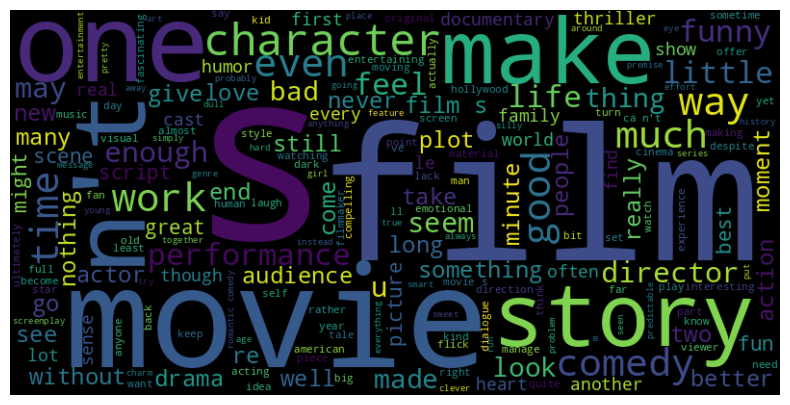

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the list of words to a string
text = ' '.join(list(train['text']))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Applying Machine Learning Models

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.svm import SVC
# Initialize the SVM classifier
classifier = SVC()
# Train the SVM classifier
classifier.fit(X_train, Y_train)

SVC()

In [ ]:
# Make predictions on the testing data
predictions = classifier.predict(X_test)

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.40497737556561086


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(Y_test, predictions)


print('\nTrue Positives(TP) = ', confusion_metric[0,0])

print('\nTrue Negatives(TN) = ', confusion_metric[1,1])

print('\nFalse Positives(FP) = ', confusion_metric[0,1])

print('\nFalse Negatives(FN) = ', confusion_metric[1,0])


True Positives(TP) =  16

True Negatives(TN) =  423

False Positives(FP) =  204

False Negatives(FN) =  9


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, predictions))

TP = confusion_metric[0,0]
TN = confusion_metric[1,1]
FP = confusion_metric[0,1]
FN = confusion_metric[1,0]

error = (FP + FN) / float(TP + TN + FP + FN)
print('Error:',format(error))

precision = TP / float(TP + FP)
print('Precision:',format(precision))

recall = TP / float(TP + FN)
print('Recall:',format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate:',format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate:',format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity:',format(specificity))

              precision    recall  f1-score   support

           1       0.57      0.06      0.10       279
           2       0.45      0.67      0.54       633
           3       0.30      0.05      0.09       389
           4       0.35      0.75      0.47       510
           5       0.77      0.14      0.23       399

    accuracy                           0.40      2210
   macro avg       0.49      0.33      0.29      2210
weighted avg       0.47      0.40      0.33      2210

Error: 0.3266871165644172
Precision: 0.07272727272727272
Recall: 0.64
True Positive Rate: 0.64
False Positive Rate: 0.3253588516746411
Specificity: 0.6746411483253588


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


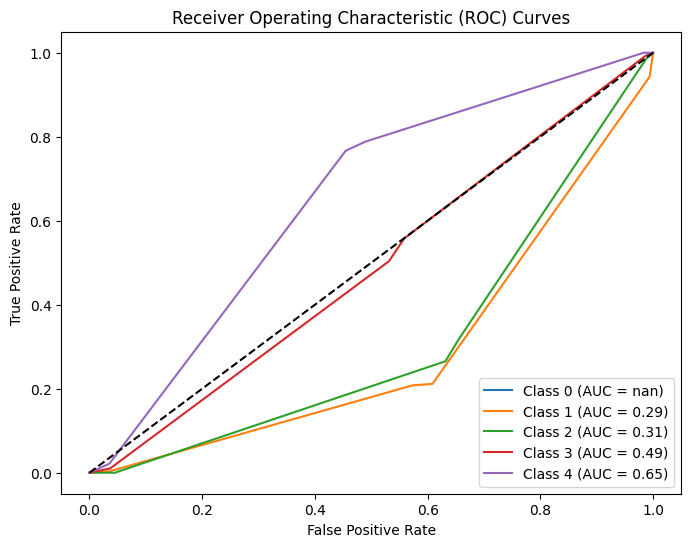

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Compute the predicted probabilities for each class using predict_proba
y_scores = classifier.predict(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    # Prepare the true labels for the current class
    y_true_class = np.where(Y_test == i, 1, 0)

    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_scores)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)

predictions = dt_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print("DT Model Accuracy:", accuracy)

DT Model Accuracy: 0.29728506787330317


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(Y_test, predictions)


print('\nTrue Positives(TP) = ', confusion_metric[0,0])

print('\nTrue Negatives(TN) = ', confusion_metric[1,1])

print('\nFalse Positives(FP) = ', confusion_metric[0,1])

print('\nFalse Negatives(FN) = ', confusion_metric[1,0])


True Positives(TP) =  56

True Negatives(TN) =  215

False Positives(FP) =  103

False Negatives(FN) =  104


In [ ]:
print(classification_report(Y_test, predictions))

TP = confusion_metric[0,0]
TN = confusion_metric[1,1]
FP = confusion_metric[0,1]
FN = confusion_metric[1,0]


error = (FP + FN) / float(TP + TN + FP + FN)
print('Error:',format(error))

precision = TP / float(TP + FP)
print('Precision:',format(precision))

recall = TP / float(TP + FN)
print('Recall:',format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate:',format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate:',format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity:',format(specificity))

              precision    recall  f1-score   support

           1       0.23      0.20      0.21       279
           2       0.37      0.34      0.35       633
           3       0.23      0.24      0.24       389
           4       0.28      0.38      0.32       510
           5       0.34      0.25      0.28       399

    accuracy                           0.30      2210
   macro avg       0.29      0.28      0.28      2210
weighted avg       0.30      0.30      0.30      2210

Error: 0.4330543933054393
Precision: 0.3522012578616352
Recall: 0.35
True Positive Rate: 0.35
False Positive Rate: 0.3238993710691824
Specificity: 0.6761006289308176


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


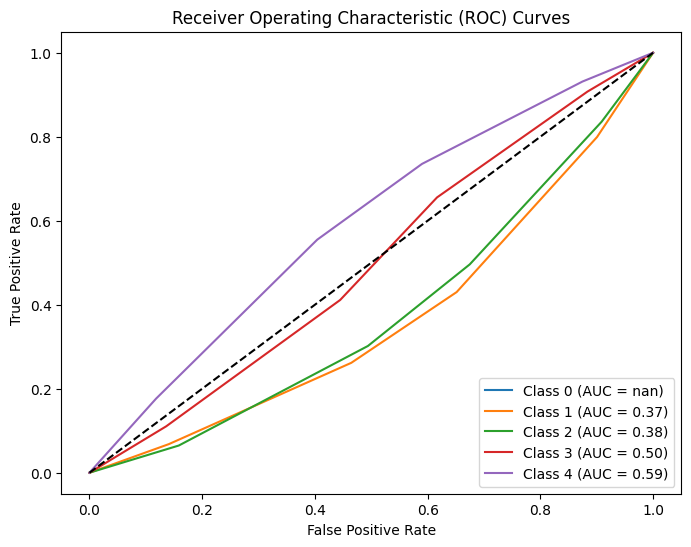

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Compute the predicted probabilities for each class using predict_proba
y_scores = dt_model.predict(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    # Prepare the true labels for the current class
    y_true_class = np.where(Y_test == i, 1, 0)

    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_scores)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)

predictions = dt_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print("RF Model Accuracy:", accuracy)

RF Model Accuracy: 0.29728506787330317


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(Y_test, predictions)


print('\nTrue Positives(TP) = ', confusion_metric[0,0])

print('\nTrue Negatives(TN) = ', confusion_metric[1,1])

print('\nFalse Positives(FP) = ', confusion_metric[0,1])

print('\nFalse Negatives(FN) = ', confusion_metric[1,0])


True Positives(TP) =  56

True Negatives(TN) =  215

False Positives(FP) =  103

False Negatives(FN) =  104


In [ ]:
print(classification_report(Y_test, predictions))

TP = confusion_metric[0,0]
TN = confusion_metric[1,1]
FP = confusion_metric[0,1]
FN = confusion_metric[1,0]

error = (FP + FN) / float(TP + TN + FP + FN)
print('Error:',format(error))

precision = TP / float(TP + FP)
print('Precision:',format(precision))

recall = TP / float(TP + FN)
print('Recall:',format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate:',format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate:',format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity:',format(specificity))

              precision    recall  f1-score   support

           1       0.23      0.20      0.21       279
           2       0.37      0.34      0.35       633
           3       0.23      0.24      0.24       389
           4       0.28      0.38      0.32       510
           5       0.34      0.25      0.28       399

    accuracy                           0.30      2210
   macro avg       0.29      0.28      0.28      2210
weighted avg       0.30      0.30      0.30      2210

Error: 0.4330543933054393
Precision: 0.3522012578616352
Recall: 0.35
True Positive Rate: 0.35
False Positive Rate: 0.3238993710691824
Specificity: 0.6761006289308176


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


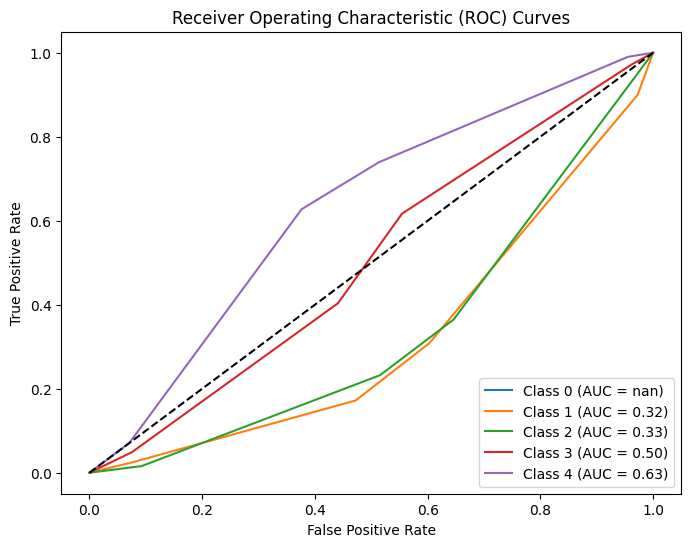

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Compute the predicted probabilities for each class using predict_proba
y_scores = rf_model.predict(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    # Prepare the true labels for the current class
    y_true_class = np.where(Y_test == i, 1, 0)

    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_scores)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_test)

predictions = knn_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print("KNeighbors Classifier Model Accuracy:", accuracy)

KNeighbors Classifier Model Accuracy: 0.18506787330316743


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(Y_test, predictions)


print('\nTrue Positives(TP) = ', confusion_metric[0,0])

print('\nTrue Negatives(TN) = ', confusion_metric[1,1])

print('\nFalse Positives(FP) = ', confusion_metric[0,1])

print('\nFalse Negatives(FN) = ', confusion_metric[1,0])


True Positives(TP) =  2

True Negatives(TN) =  22

False Positives(FP) =  16

False Negatives(FN) =  3


In [ ]:
print(classification_report(Y_test, predictions))

TP = confusion_metric[0,0]
TN = confusion_metric[1,1]
FP = confusion_metric[0,1]
FN = confusion_metric[1,0]


error = (FP + FN) / float(TP + TN + FP + FN)
print('Error:',format(error))

precision = TP / float(TP + FP)
print('Precision:',format(precision))

recall = TP / float(TP + FN)
print('Recall:',format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate:',format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate:',format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity:',format(specificity))

              precision    recall  f1-score   support

           1       0.33      0.01      0.01       279
           2       0.37      0.03      0.06       633
           3       0.18      0.93      0.30       389
           4       0.22      0.04      0.06       510
           5       0.86      0.02      0.03       399

    accuracy                           0.19      2210
   macro avg       0.39      0.20      0.09      2210
weighted avg       0.38      0.19      0.09      2210

Error: 0.4418604651162791
Precision: 0.1111111111111111
Recall: 0.4
True Positive Rate: 0.4
False Positive Rate: 0.42105263157894735
Specificity: 0.5789473684210527


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


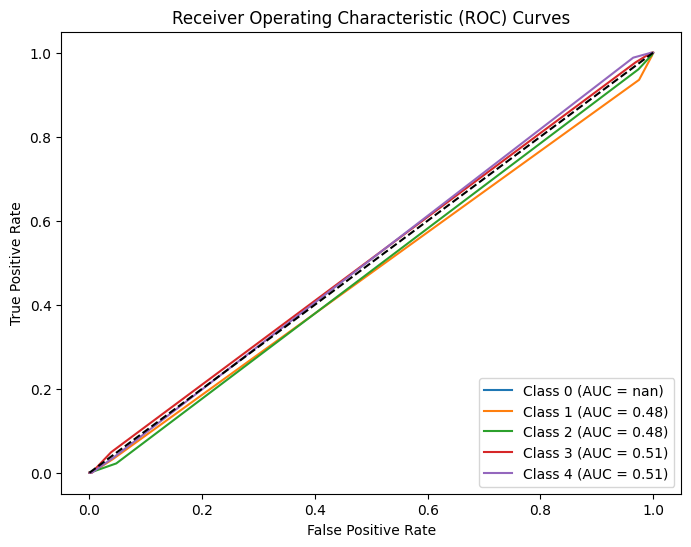

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Compute the predicted probabilities for each class using predict_proba
y_scores = knn_model.predict(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    # Prepare the true labels for the current class
    y_true_class = np.where(Y_test == i, 1, 0)

    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_scores)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


# Applying Neural Network

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['text'])

x_train = tokenizer.texts_to_sequences(train['text'])
x_test = tokenizer.texts_to_sequences(test['text'])

In [ ]:
y_train = train['label'].values
y_test = test['label'].values

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100  # Maximum sequence length
train_data = pad_sequences(x_train, maxlen=max_length)
test_data = pad_sequences(x_test, maxlen=max_length)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

embedding_dim = 100  # Dimension of word embeddings
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1395800   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,468,509
Trainable params: 1,468,509
Non-trainable params: 0
______________________________________________

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train['label']).astype('int32')
test_labels_encoded = label_encoder.transform(test['label']).astype('int32')

In [ ]:
batch_size = 32
epochs = 10

cnnn = model.fit(train_data, train_labels_encoded, batch_size=batch_size, epochs=epochs)

Epoch 1/10
267/267 [==============================] - 26s 80ms/step - loss: 1.5284 - accuracy: 0.3139
Epoch 2/10
267/267 [==============================] - 7s 25ms/step - loss: 1.1309 - accuracy: 0.5249
Epoch 3/10
267/267 [==============================] - 4s 15ms/step - loss: 0.4943 - accuracy: 0.8260
Epoch 4/10
267/267 [==============================] - 2s 8ms/step - loss: 0.1282 - accuracy: 0.9654
Epoch 5/10
267/267 [==============================] - 2s 7ms/step - loss: 0.0425 - accuracy: 0.9891
Epoch 6/10
267/267 [==============================] - 2s 6ms/step - loss: 0.0190 - accuracy: 0.9957
Epoch 7/10
267/267 [==============================] - 5s 17ms/step - loss: 0.0110 - accuracy: 0.9972
Epoch 8/10
267/267 [==============================] - 1s 5ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 9/10
267/267 [==============================] - 2s 7ms/step - loss: 0.0056 - accuracy: 0.9982
Epoch 10/10
267/267 [==============================] - 2s 6ms/step - loss: 0.0045 - accuracy: 0

In [ ]:
# Evaluate on the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert the encoded labels back to their original form
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Compute evaluation metrics
accuracy = accuracy_score(test['label'], predicted_labels)
precision = precision_score(test['label'], predicted_labels, average='weighted')
recall = recall_score(test['label'], predicted_labels, average='weighted')
f1 = f1_score(test['label'], predicted_labels, average='weighted')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


70/70 [==============================] - 0s 2ms/step
Test Accuracy: 0.3860
Precision: 0.3859
Recall: 0.3860
F1-Score: 0.3819


70/70 [==============================] - 0s 2ms/step


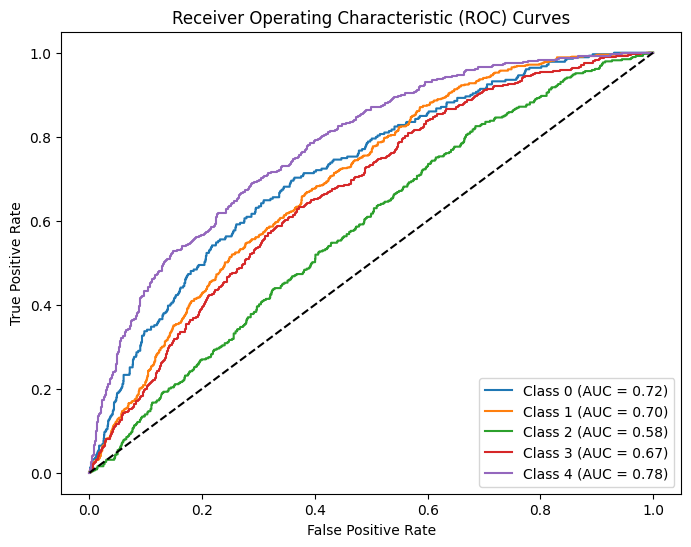

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Train your neural network model on the training data

# Obtain the predicted probabilities for each class on the test data
y_scores = model.predict(test_data)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    # Prepare the true labels for the current class
    y_true_class = np.where(test_labels_encoded == i, 1, 0)

    # Get the predicted probabilities for the current class
    y_scores_class = y_scores[:, i]

    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_scores_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


# Making a Predictive System

In [ ]:
X_new = X_test[500]

prediction = classifier.predict(X_new)
print(prediction)

if (prediction == 1):
    print('Worst Review')
elif (prediction == 2):
    print('Bad Review')
elif (prediction == 3):
    print('Neutral Review')
elif (prediction == 4):
    print('Good Review')
else:
    print('Excellent Review')

[2]
Bad Review
